
It is the kernel that I have tried and compiled from the courses of [DATAI Team](https://www.udemy.com/user/datai-team/) (Language of the courses is Turkish: [Machine Learning ve Python: A'dan Z'ye Makine Öğrenmesi](https://www.udemy.com/machine-learning-ve-python-adan-zye-makine-ogrenmesi-4)), which is [Grandmaster on Kaggle](https://www.kaggle.com/kanncaa1) and has more than 15 courses on Udemy.

# **Content**

## Regression

* [Linear Regression](#1.)
* [Multiple Linear Regression](#2.)
* [Polynomial Linear Regression](#3.)
* [Support Vector Regression](#4.)
* [Decision Tree Regression](#5.)
* [Random Forest Regression](#6.)

![](https://iili.io/J1bpse.md.png)




## Classification

* [K-Nearest Neighbour (KNN) Classification](#7.)
* [Support Vector Machine (SVM) Classification](#8.)
* [Naive Bayes Classification](#9.)
* [Decision Tree Classification](#10.)
* [Random Forest Classification](#11.)

![](https://iili.io/J1bmX9.png)





## Clustering

* [K-Means Clustering](#12.)
* [Hierarchical Clustering](#13.)


![](https://iili.io/J1m9qu.png)




## Other Content

* [Natural Language Process (NLP)](#14.)
* [Principal Component Analysis (PCA)](#15.)
* [Model Selection](#16.)
* [Recommendation Systems](#17.)




# Regression
<a class="anchor" id="1."></a> 
# Linear Regression



In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import math

# import data
data = pd.read_csv("../input/linearregressiondataset3/linear-regression-dataset.csv")
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
deneyim    14 non-null float64
maas       14 non-null int64
dtypes: float64(1), int64(1)
memory usage: 304.0 bytes
None
   deneyim  maas
0      0.5  2500
1      0.0  2250
2      1.0  2750
3      5.0  8000
4      8.0  9000


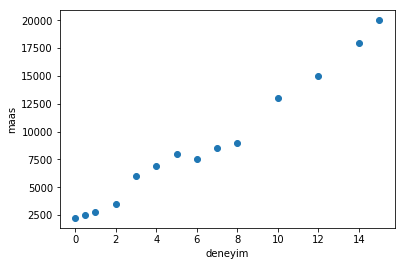

In [2]:
# plot data
plt.scatter(data.deneyim,data.maas)
plt.xlabel("deneyim")
plt.ylabel("maas")
plt.show()

In [3]:
#%% linear regression

# sklearn library
from sklearn.linear_model import LinearRegression
# linear regression model
linear_reg = LinearRegression()

x = data.deneyim.values.reshape(-1,1)
y = data.maas.values.reshape(-1,1)

linear_reg.fit(x,y)

print('R sq: ', linear_reg.score(x, y))
print('Correlation: ', math.sqrt(linear_reg.score(x, y)))

R sq:  0.9775283164949903
Correlation:  0.9887003168275968


In [4]:
#%% prediction
import numpy as np

print("Coefficient for X: ", linear_reg.coef_)
print("Intercept for X: ", linear_reg.intercept_)
print("Regression line is: y = " + str(linear_reg.intercept_[0]) + " + (x * " + str(linear_reg.coef_[0][0]) + ")")

# maas = 1663 + 1138*deneyim 
maas_yeni = 1663 + 1138*11
print(maas_yeni)

array = np.array([11]).reshape(-1,1)
print(linear_reg.predict(array))

Coefficient for X:  [[1138.34819698]]
Intercept for X:  [1663.89519747]
Regression line is: y = 1663.8951974741067 + (x * 1138.3481969755717)
14181
[[14185.72536421]]


array([[115498.71489503]])

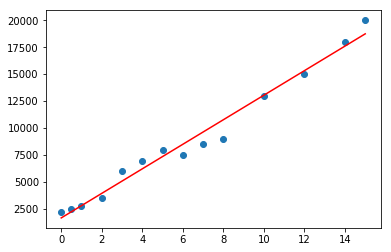

In [5]:
# visualize line
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  # deneyim

plt.scatter(x,y)
#plt.show()
y_head = linear_reg.predict(array)  # maas
plt.plot(array, y_head,color = "red")
array = np.array([100]).reshape(-1,1)
linear_reg.predict(array)

In [6]:
y_head = linear_reg.predict(x)  # maas
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))

r_square score:  0.9775283164949903



<a class="anchor" id="2."></a> 
# Multiple Linear Regression

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv("../input/multiplelinearregressiondataset/multiple-linear-regression-dataset.csv")
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
deneyim    14 non-null float64
maas       14 non-null int64
yas        14 non-null int64
dtypes: float64(1), int64(2)
memory usage: 416.0 bytes
None
   deneyim  maas  yas
0      0.5  2500   22
1      0.0  2250   21
2      1.0  2750   23
3      5.0  8000   25
4      8.0  9000   28


In [8]:
x = data.iloc[:,[0,2]].values
y = data.maas.values.reshape(-1,1)

multiple_linear_regression = LinearRegression()
multiple_linear_regression.fit(x,y)

print("b0: ",multiple_linear_regression.intercept_)
print("b1: ", multiple_linear_regression.coef_)

#predict
x_ = np.array([[10,35],[5,35]])
multiple_linear_regression.predict(x_)

y_head = multiple_linear_regression.predict(x) 
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))

b0:  [10376.62747228]
b1:  [[1525.50072054 -416.72218625]]
r_square score:  0.9818393838730447



<a class="anchor" id="3."></a> 
# Polynomial Linear Regression

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../input/polynomialregressioncsv/polynomial-regression.csv")
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
araba_fiyat      15 non-null int64
araba_max_hiz    15 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes
None
   araba_fiyat  araba_max_hiz
0           60            180
1           70            180
2           80            200
3          100            200
4          120            200


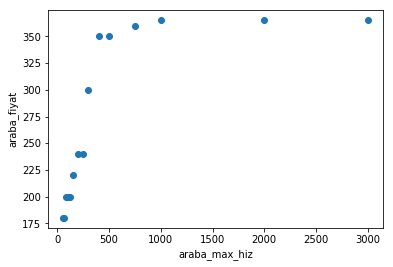

In [10]:
x = data.araba_fiyat.values.reshape(-1,1)
y = data.araba_max_hiz.values.reshape(-1,1)

plt.scatter(x,y)
plt.xlabel("araba_max_hiz")
plt.ylabel("araba_fiyat")
plt.show()

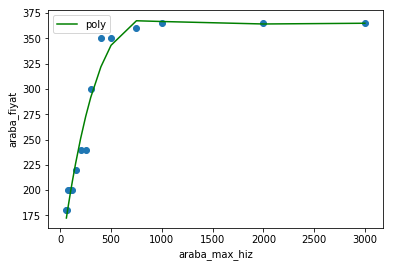

r_square score:  0.9694743023124649


In [11]:
# polynomial regression =  y = b0 + b1*x +b2*x^2 + b3*x^3 + ... + bn*x^n
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynominal_regression = PolynomialFeatures(degree=4)
x_polynomial = polynominal_regression.fit_transform(x,y)

# %% fit
linear_regression = LinearRegression()
linear_regression.fit(x_polynomial,y)
# %%
y_head2 = linear_regression.predict(x_polynomial)

plt.plot(x,y_head2,color= "green",label = "poly")
plt.legend()
plt.scatter(x,y)
plt.xlabel("araba_max_hiz")
plt.ylabel("araba_fiyat")
plt.show()

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head2))




<a class="anchor" id="4."></a> 
# Support Vector Regression

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../input/support-vector-regression/maaslar.csv")
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
unvan              10 non-null object
Egitim Seviyesi    10 non-null int64
maas               10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes
None
              unvan  Egitim Seviyesi  maas
0             Cayci                1  2250
1          Sekreter                2  2500
2  Uzman Yardimcisi                3  3000
3             Uzman                4  4000
4  Proje Yoneticisi                5  5500


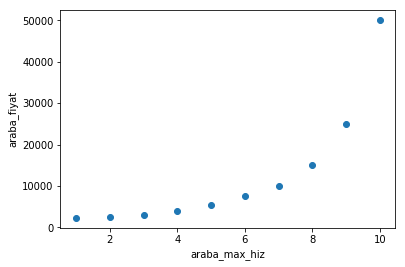

In [13]:
x = data.iloc[:,1:2].values
y = data.iloc[:,2:].values

plt.scatter(x,y)
plt.xlabel("araba_max_hiz")
plt.ylabel("araba_fiyat")
plt.show()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:585: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:585: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:585: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:585: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:747: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

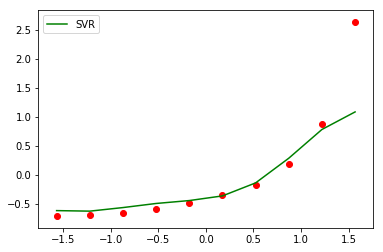

R sq:  0.7513836788854973


In [14]:
#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(x)
sc2 = StandardScaler()
y_olcekli = sc2.fit_transform(y)

#%% SVR
from sklearn.svm import SVR

svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_olcekli,y_olcekli)

y_head = svr_reg.predict(x_olcekli)

# visualize line
plt.plot(x_olcekli,y_head,color= "green",label = "SVR")
plt.legend()
plt.scatter(x_olcekli,y_olcekli,color='red')
plt.show()

print('R sq: ', svr_reg.score(x_olcekli, y_olcekli))


<a class="anchor" id="5."></a> 
# Decision Tree Regression

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../input/decisiontreeregressiondataset/decision-tree-regression-dataset.csv", header=None)
print(data.info())
print(data.head())
#print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
0    10 non-null int64
1    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes
None
   0    1
0  1  100
1  2   80
2  3   70
3  4   60
4  5   50


In [16]:
x = data.iloc[:,[0]].values.reshape(-1,1)
y = data.iloc[:,[1]].values.reshape(-1,1)

In [17]:
#%%  decision tree regression
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x,y)

print(tree_reg.predict(np.array([5.5]).reshape(-1,1)))

[50.]


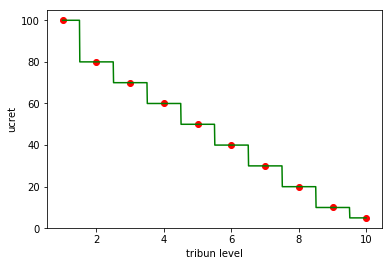

r_square score:  1.0


In [18]:
x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
#print(x)
y_head = tree_reg.predict(x_)
#print(y_head)

# %% visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color = "green")
plt.xlabel("tribun level")
plt.ylabel("ucret")
plt.show()

y_head = tree_reg.predict(x)
#from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))


<a class="anchor" id="6."></a> 
# Random Forest Regression

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../input/randomforestregressiondataset/random-forest-regression-dataset.csv", header=None)
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
0    10 non-null int64
1    10 non-null int64
dtypes: int64(2)
memory usage: 240.0 bytes
None
   0    1
0  1  100
1  2   80
2  3   70
3  4   60
4  5   50


In [20]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1)

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state= 42) 
rf.fit(x,y)

print("7.8 seviyesinde fiyatın ne kadar olduğu: ",rf.predict(np.array([7.8]).reshape(-1,1)))

x_ = np.arange(min(x),max(x),0.01).reshape(-1,1)
y_head = rf.predict(x_)

7.8 seviyesinde fiyatın ne kadar olduğu:  [22.7]


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


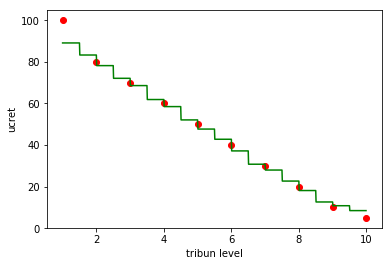

In [22]:
# visualize
plt.scatter(x,y,color="red")
plt.plot(x_,y_head,color="green")
plt.xlabel("tribun level")
plt.ylabel("ucret")
plt.show()

In [23]:
y_head = rf.predict(x)
from sklearn.metrics import r2_score
print("r_score: ", r2_score(y,y_head))

r_score:  0.9798724794092587


# Classification
<a class="anchor" id="7."></a> 
# K-Nearest Neighbour (KNN) Classification

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../input/classification/data.csv")
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


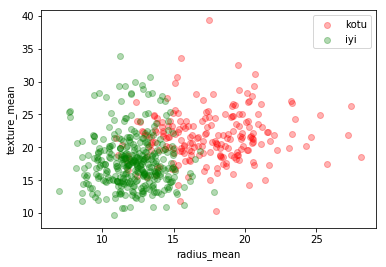

In [25]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [26]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [27]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %%
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9532163742690059 


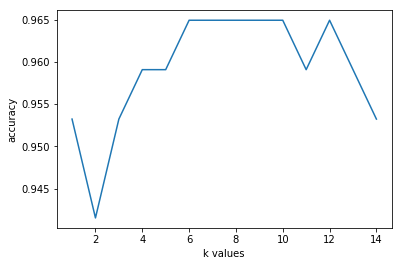

In [28]:
# %%
# find k value
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [29]:
# %%
# knn model
knn = KNeighborsClassifier(n_neighbors = 8) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.9649122807017544 


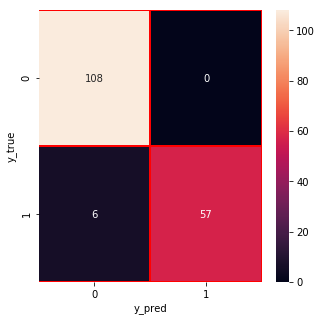

In [30]:
#%% confusion matrix
y_pred = knn.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="8."></a> 
# Support Vector Machine (SVM) Classification

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../input/classification/data.csv")
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


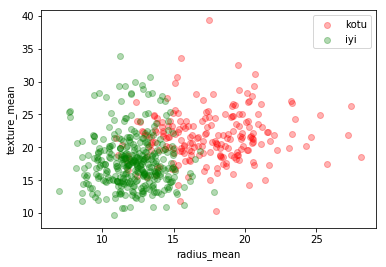

In [32]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [33]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [34]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %% SVM
from sklearn.svm import SVC
 
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
# %% test
print("print accuracy of svm algo: ",svm.score(x_test,y_test))



print accuracy of svm algo:  0.9532163742690059


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


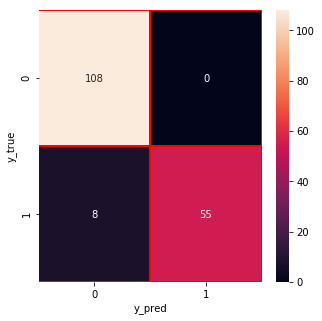

In [35]:
#%% confusion matrix
y_pred = svm.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="9."></a> 
# Naive Bayes Classification

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../input/classification/data.csv")
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


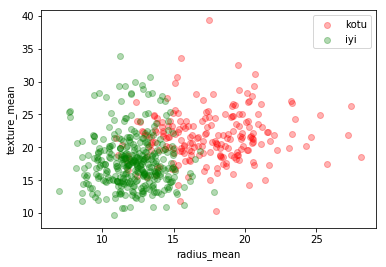

In [37]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [38]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [39]:
#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %% Naive bayes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

nb.score(x_test,y_test)
 # %% test
print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.935672514619883


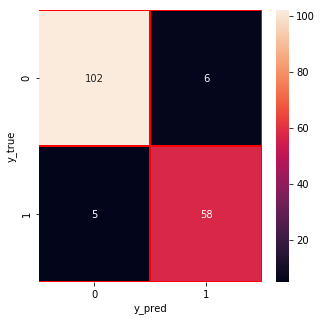

In [40]:
#%% confusion matrix
y_pred = nb.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="10."></a> 
# Decision Tree Classification

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../input/classification/data.csv")
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


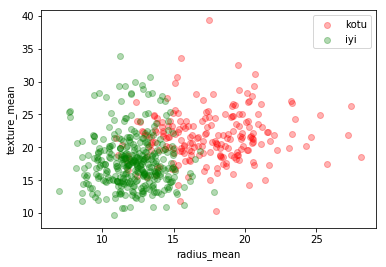

In [42]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [43]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [44]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

#%%
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("score: ", dt.score(x_test,y_test))

score:  0.9302325581395349


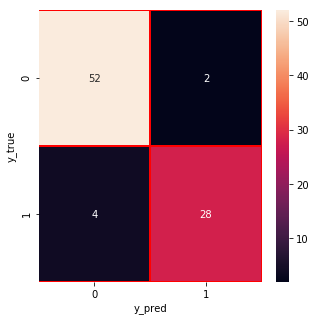

In [45]:
#%% confusion matrix
y_pred = dt.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


<a class="anchor" id="11."></a> 
# Random Forest Classification

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("../input/classification/data.csv")
#print(data.info())
#print(data.head())
#print(data.describe())
# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


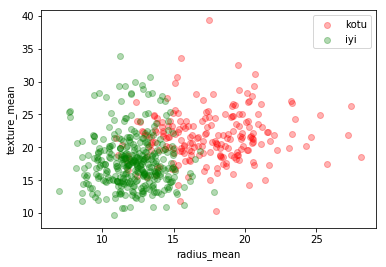

In [47]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [48]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [49]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

random forest algo result:  0.9534883720930233


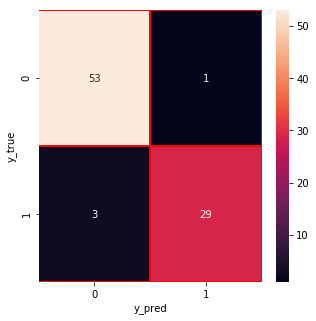

In [50]:
#%% confusion matrix
y_pred = rf.predict(x_test)
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,y_pred)

# %% cm visualization
import seaborn as sns

f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

# Clustering
<a class="anchor" id="12."></a> 
# K-Means Clustering

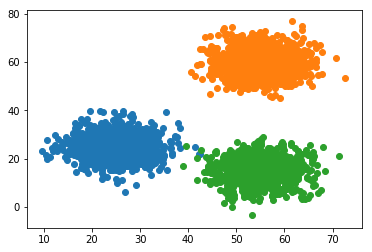

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset
# class1
x1 = np.random.normal(25,5,1000)
y1 = np.random.normal(25,5,1000)

# class2
x2 = np.random.normal(55,5,1000)
y2 = np.random.normal(60,5,1000)

# class3
x3 = np.random.normal(55,5,1000)
y3 = np.random.normal(15,5,1000)

x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

dictionary = {"x":x,"y":y}
data = pd.DataFrame(dictionary)

plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.scatter(x3,y3)
plt.show()

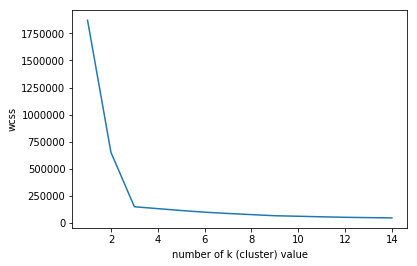

In [52]:
# %% KMEANS

from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

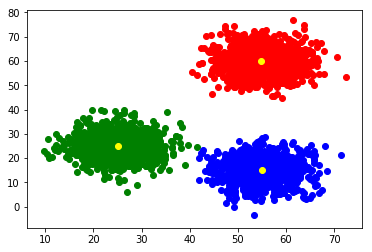

In [53]:
#%% k = 3 icin modelim
kmeans2 = KMeans(n_clusters=3)
clusters = kmeans2.fit_predict(data)

data["label"] = clusters

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color = "yellow")
plt.show()


<a class="anchor" id="13."></a> 
# Hierarchical Clustering

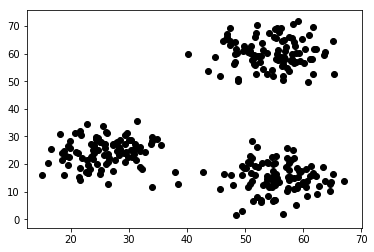

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# %% create dataset
# class1
x1 = np.random.normal(25,5,100)
y1 = np.random.normal(25,5,100)

# class2
x2 = np.random.normal(55,5,100)
y2 = np.random.normal(60,5,100)

# class3
x3 = np.random.normal(55,5,100)
y3 = np.random.normal(15,5,100)

x = np.concatenate((x1,x2,x3),axis = 0)
y = np.concatenate((y1,y2,y3),axis = 0)

dictionary = {"x":x,"y":y}

data = pd.DataFrame(dictionary)

plt.scatter(x1,y1,color="black")
plt.scatter(x2,y2,color="black")
plt.scatter(x3,y3,color="black")
plt.show()

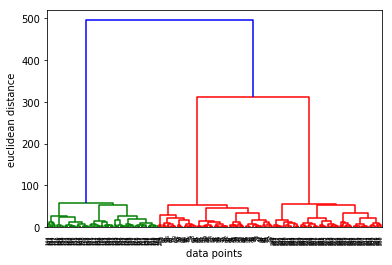

In [55]:
# %% dendogram
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(data,method="ward")
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

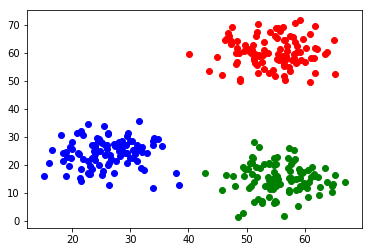

In [56]:
# %% HC
from sklearn.cluster import AgglomerativeClustering

hiyerartical_cluster = AgglomerativeClustering(n_clusters = 3,affinity= "euclidean",linkage = "ward")
cluster = hiyerartical_cluster.fit_predict(data)

data["label"] = cluster

plt.scatter(data.x[data.label == 0 ],data.y[data.label == 0],color = "red")
plt.scatter(data.x[data.label == 1 ],data.y[data.label == 1],color = "green")
plt.scatter(data.x[data.label == 2 ],data.y[data.label == 2],color = "blue")
#plt.scatter(data.x[data.label == 3 ],data.y[data.label == 3],color = "black")
plt.show()

# Other Content
<a class="anchor" id="14."></a> 
# Natural Language Process (NLP)

In [57]:
import pandas as pd
# %% import twitter data
data = pd.read_csv("../input/natural-language-process-nlp/gender-classifier.csv",encoding = "latin1")
data = pd.concat([data.gender,data.description],axis=1)
data.dropna(axis = 0,inplace = True)
data.gender = [1 if each == "female" else 0 for each in data.gender]
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16224 entries, 0 to 20049
Data columns (total 2 columns):
gender         16224 non-null int64
description    16224 non-null object
dtypes: int64(1), object(1)
memory usage: 380.2+ KB
None
   gender                                        description
0       0                              i sing my own rhythm.
1       0  I'm the author of novels filled with family dr...
2       0                louis whining and squealing and all
3       0  Mobile guy.  49ers, Shazam, Google, Kleiner Pe...
4       1  Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...


In [58]:
import nltk # natural language tool kit
#nltk.download("stopwords")      # corpus diye bir kalsore indiriliyor
from nltk.corpus import stopwords  # sonra ben corpus klasorunden import ediyorum
import re
description_list = []
for description in data.description:
    description = re.sub("[^a-zA-Z]"," ",description) # regular expression RE mesela "[^a-zA-Z]"
    description = description.lower()   # buyuk harftan kucuk harfe cevirme
    description = nltk.word_tokenize(description)# split kullanırsak "shouldn't " gibi kelimeler "should" ve "not" diye ikiye ayrılmaz ama word_tokenize() kullanirsak ayrilir
    description = [ word for word in description if not word in set(stopwords.words("english"))] # greksiz kelimeleri cikar
    lemma = nltk.WordNetLemmatizer() # lemmatazation loved => love   gitmeyecegim = > git
    description = [ lemma.lemmatize(word) for word in description]
    description = " ".join(description)
    description_list.append(description)
#print(description_list)

In [59]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer # bag of words yaratmak icin kullandigim metot
max_features = 5000

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  # x

#print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names()))


In [60]:
# %%
y = data.iloc[:,0].values   # male or female classes
x = sparce_matrix
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [61]:
# %% naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
#%% prediction
y_pred = nb.predict(x_test)
print("accuracy: ",nb.score(y_pred.reshape(-1,1),y_test))

accuracy:  0.48120764017252005



<a class="anchor" id="15."></a> 
# Principal Component Analysis (PCA)

In [62]:
from sklearn.datasets import load_iris
import pandas as pd
# %%
iris = load_iris()

feature_names = iris.feature_names
y = iris.target

data = pd.DataFrame(iris.data,columns = feature_names)
data["sinif"] = y

x = iris.data
print(data.info())
print(data.head())
#print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
sinif                150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None
   sepal length (cm)  sepal width (cm)  ...    petal width (cm)  sinif
0                5.1               3.5  ...                 0.2      0
1                4.9               3.0  ...                 0.2      0
2                4.7               3.2  ...                 0.2      0
3                4.6               3.1  ...                 0.2      0
4                5.0               3.6  ...                 0.2      0

[5 rows x 5 columns]


In [63]:
#%% PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2, whiten= True )  # whitten = normalize
pca.fit(x)

x_pca = pca.transform(x)

print("variance ratio: ", pca.explained_variance_ratio_)
print("sum: ",sum(pca.explained_variance_ratio_))

variance ratio:  [0.92461872 0.05306648]
sum:  0.977685206318795


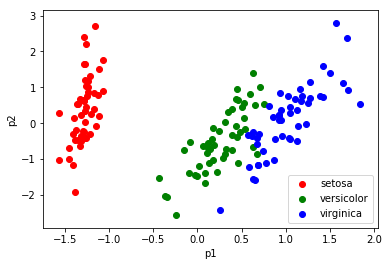

In [64]:
#%% 2D
data["p1"] = x_pca[:,0]
data["p2"] = x_pca[:,1]

color = ["red","green","blue"]

import matplotlib.pyplot as plt
for each in range(3):
    plt.scatter(data.p1[data.sinif == each],data.p2[data.sinif == each],color = color[each],label = iris.target_names[each])
    
plt.legend()
plt.xlabel("p1")
plt.ylabel("p2")
plt.show()


<a class="anchor" id="16."></a> 
# Model Selection

In [65]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
#%%
iris = load_iris()
x = iris.data
y = iris.target

data = pd.DataFrame(iris.data,columns = feature_names)
data["sinif"] = y

print(data.info())
print(data.head())
#print(data.describe())

# %% normalization
x = (x-np.min(x))/(np.max(x)-np.min(x))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
sinif                150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB
None
   sepal length (cm)  sepal width (cm)  ...    petal width (cm)  sinif
0                5.1               3.5  ...                 0.2      0
1                4.9               3.0  ...                 0.2      0
2                4.7               3.2  ...                 0.2      0
3                4.6               3.1  ...                 0.2      0
4                5.0               3.6  ...                 0.2      0

[5 rows x 5 columns]


In [66]:
# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

# knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 13) # n_neighbors = k

# %% K fold CV K = 10
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = knn, X = x_train, y= y_train, cv = 10)
print("average accuracy: ",np.mean(accuracies))
print("average std: ",np.std(accuracies))

knn.fit(x_train,y_train)
print("test accuracy: ",knn.score(x_test,y_test))

average accuracy:  0.9805555555555555
average std:  0.03938179688543842
test accuracy:  0.9555555555555556


In [67]:
#Model Selection  grid search cross validation for knn
from sklearn.model_selection import GridSearchCV

grid = {"n_neighbors":np.arange(1,50)}
knn= KNeighborsClassifier()

knn_cv = GridSearchCV(knn, grid, cv = 10)  # GridSearchCV
knn_cv.fit(x,y)

#%% print hyperparameter KNN algoritmasindaki K degeri
print("tuned hyperparameter K: ",knn_cv.best_params_)
print("tuned parametreye gore en iyi accuracy (best score): ",knn_cv.best_score_)

tuned hyperparameter K:  {'n_neighbors': 13}
tuned parametreye gore en iyi accuracy (best score):  0.98


In [68]:
#Model Selection Grid search CV with logistic regression
x = x[:100,:]
y = y[:100] 

from sklearn.linear_model import LogisticRegression
grid = {"C":np.logspace(-3,3,7),"penalty":["l1","l2"]}  # l1 = lasso ve l2 = ridge

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv = 10)
logreg_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ",logreg_cv.best_params_)
print("accuracy: ",logreg_cv.best_score_)

tuned hyperparameters: (best parameters):  {'C': 0.1, 'penalty': 'l2'}
accuracy:  1.0




<a class="anchor" id="17."></a> 
# Recommendation Systems

In [69]:
import pandas as pd
import os
print(os.listdir("../input/movielens-20m-dataset/"))
# import movie data set and look at columns
movie = pd.read_csv("../input/movielens-20m-dataset/movie.csv")
print(movie.columns)
movie = movie.loc[:,["movieId","title"]]
movie.head(10)

['link.csv', 'genome_tags.csv', 'movie.csv', 'genome_scores.csv', 'tag.csv', 'rating.csv']
Index(['movieId', 'title', 'genres'], dtype='object')


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [70]:
# import rating data and look at columsn
rating = pd.read_csv("../input/movielens-20m-dataset/rating.csv")
print(rating.columns)
# what we need is that user id, movie id and rating
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head(10)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5
5,1,112,3.5
6,1,151,4.0
7,1,223,4.0
8,1,253,4.0
9,1,260,4.0


In [71]:
# then merge movie and rating data
data = pd.merge(movie,rating)
# now lets look at our data 
data.head(10)
print(data.shape)
data = data.iloc[:1000000,:]
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)

(20000263, 4)


title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),Bad Boys (1995),Balto (1995),"Basketball Diaries, The (1995)",Beautiful Girls (1996),Bed of Roses (1996),Before and After (1996),Big Bully (1996),"Big Green, The (1995)",Bio-Dome (1996),"Birdcage, The (1996)",Black Sheep (1996),Boomerang (1992),Bottle Rocket (1996),"Boys of St. Vincent, The (1992)",Braveheart (1995),"Bridges of Madison County, The (1995)",Broken Arrow (1996),"Brothers McMullen, The (1995)",Carrington (1995),Casino (1995),Catwalk (1996),Chungking Express (Chung Hing sam lam) (1994),City Hall (1996),"City of Lost Children, The (Cité des enfants perdus, La) (1995)",Clueless (1995),"Confessional, The (Confessionnal, Le) (1995)",Copycat (1995),"Crossing Guard, The (1995)","Cry, the Beloved Country (1995)",Cutthroat Island (1995),...,Persuasion (1995),Pie in the Sky (1996),Pocahontas (1995),"Postman, The (Postino, Il) (1994)",Powder (1995),Race the Sun (1996),Restoration (1995),Richard III (1995),Rumble in the Bronx (Hont faan kui) (1995),Sabrina (1995),Screamers (1995),Sense and Sensibility (1995),Seven (a.k.a. Se7en) (1995),Shadows (Cienie) (1988),Shanghai Triad (Yao a yao yao dao waipo qiao) (1995),Shopping (1994),"Silences of the Palace, The (Saimt el Qusur) (1994)",Sonic Outlaws (1995),"Star Maker, The (Uomo delle stelle, L') (1995)","Steal Big, Steal Little (1995)",Sudden Death (1995),Target (1995),Taxi Driver (1976),Things to Do in Denver When You're Dead (1995),To Die For (1995),Tom and Huck (1995),Toy Story (1995),Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Two Bits (1995),Two if by Sea (1996),Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Na

In [72]:
movie_watched = pivot_table["Bad Boys (1995)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Bad Boys (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Bad Boys (1995)                        1.000000
Headless Body in Topless Bar (1995)    0.723747
Last Summer in the Hamptons (1995)     0.607554
Two Bits (1995)                        0.507008
Shadows (Cienie) (1988)                0.494186
dtype: float64